# AAlogorizer Example Sheet

### Imports

In [1]:
import pandas as pd
import AALogorizer
import StandardConfig

### Import File as pandas.DataFrame

In [2]:
# directory management
path, sep = StandardConfig.find_folderpath()
path, sep

('/home/freiherr/PycharmProjects/AAlogo', '/')

In [3]:
# import of test data sequences for visualization
test_data = pd.read_excel(f"{path}{sep}example_data{sep}DeepTMHMM_sub.xlsx")
test_data.head(5)

,Unnamed: 0,entry,name,gene_name,organism,dataset,length_seq,len_signal,start_pos_signal,stop_pos_signal,len_ecto,start_pos_ecto,stop_pos_ecto,len_TMD,start_pos_TMD,stop_pos_TMD,len_endo,start_pos_endo,stop_pos_endo,sequence
0,0,Q03157,APLP1_MOUSE,Aplp1,MOUSE,SUBEXPERT,654,38.0,1.0,38.0,546,39,584,21,585,605,49,606,654,MGPTSPAARGQGRRWRPPPLPLLLPLSLLLLRAQLAVGNLAVGSPS...
1,1,Q06481,APLP2_HUMAN,APLP2,HUMAN,SUBEXPERT,763,31.0,1.0,31.0,662,32,693,21,694,714,49,715,763,MAATGTAAAAATGRLLLLLLVGLTAPALALAGYIEALAANAGTGFA...
2,2,P05067,A4_HUMAN,APP,HUMAN,SUBEXPERT,770,17.0,1.0,17.0,683,18,700,21,701,721,49,722,770,MLPGLALLLLAAWTARALEVPTDGNAGLLAEPQIAMFCGRLNMHMN...
3,3,P30530,UFO_HUMAN,AXL,HUMAN,SUBEXPERT,894,32.0,1.0,32.0,419,33,451,21,452,472,422,473,894,MAWRCPRMGRVPLAWCLALCGWACMAPRGTQAEESPFVGNPGNITG...
4,4,P35613,BASI_HUMAN,BSG,HUMAN,SUBEXPERT,385,20.0,1.0,20.0,303,21,323,21,324,344,41,345,385,MAAALFVLLGFALLGTHGASGAAGFVQAPLSQQRWVGGSVELHCEA...


#### important columns:
    start_pos_TMD
    stop_pos_TMD
    sequence

### Generate AALogos

### with config file 

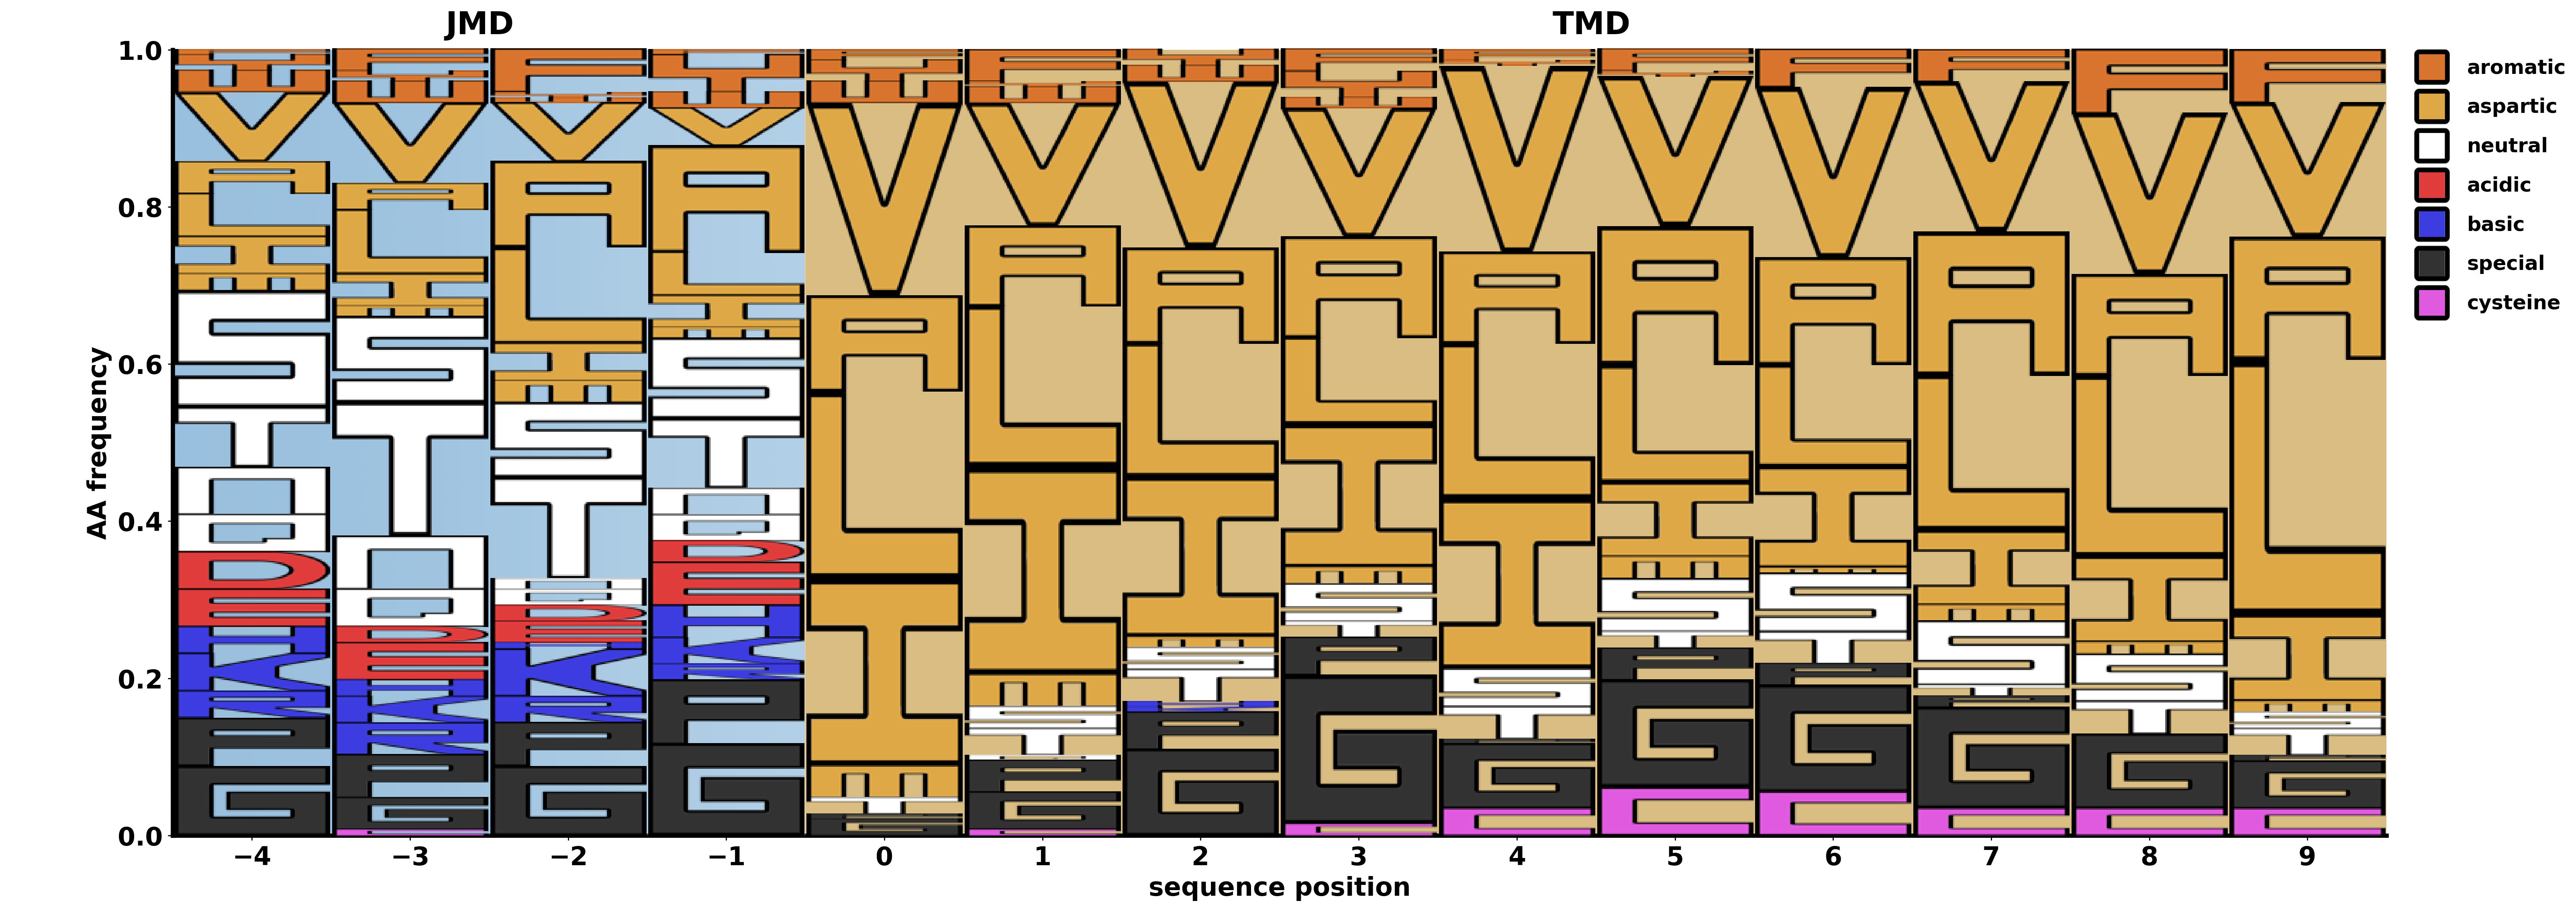

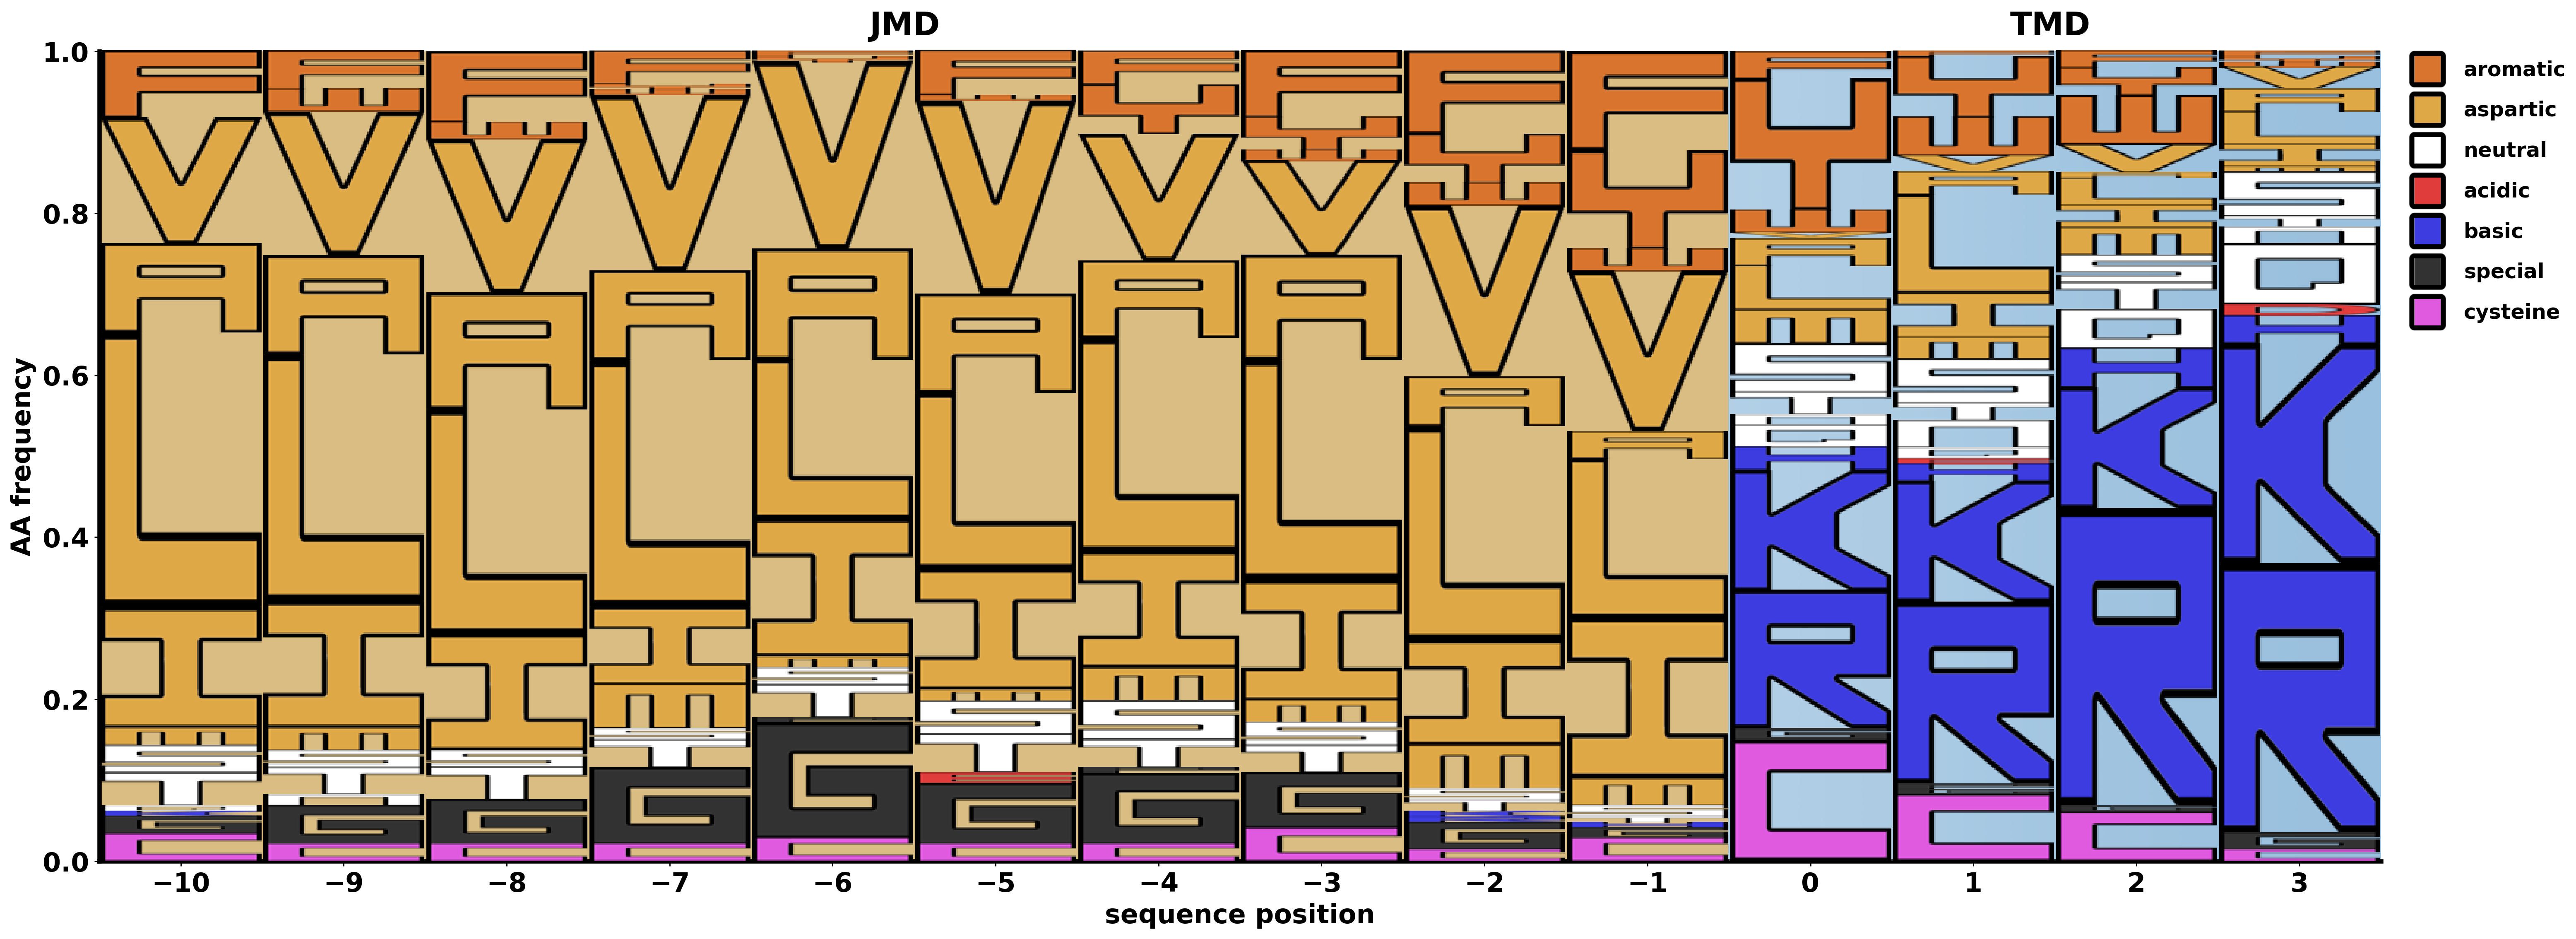

In [4]:
list_position_columns = [{"pos_seq" : "start_pos_TMD", "is_start_pos" : True, "lr" : 10, "ll" : 4, "list_title_sides" : ["JMD", "TMD"]}, 
                         {"pos_seq" : "stop_pos_TMD", "is_start_pos" : False, "ll" : 10, "lr" : 4, "list_title_sides" : ["JMD", "TMD"]}]

for dict_pos in list_position_columns:
    df_columns = ["sequence", dict_pos["pos_seq"]]
    
    # initialization
    # set_legend, list_columns
    Example_AAlogo = AALogorizer.AALogoGenerator(set_legend=True, list_columns=df_columns, start_pos = dict_pos["is_start_pos"])
    
    # Plot generation command
    # make_logo(df, name, length_tmd, length_jmd, aa_config_section_name, font_type="classic_AA_fonts")
    Example_AAlogo.make_logo(df=test_data, name="Substrates_TMHMM", length_right=dict_pos["lr"], length_left=dict_pos["ll"], 
                             aa_config_section_name="OG_AA_config", font_type="bold_AA_fonts", list_title_sides = dict_pos["list_title_sides"])

### color mapping (inpult hydrophobicity order (Kyte and Doolittle, 1982) and coloring)

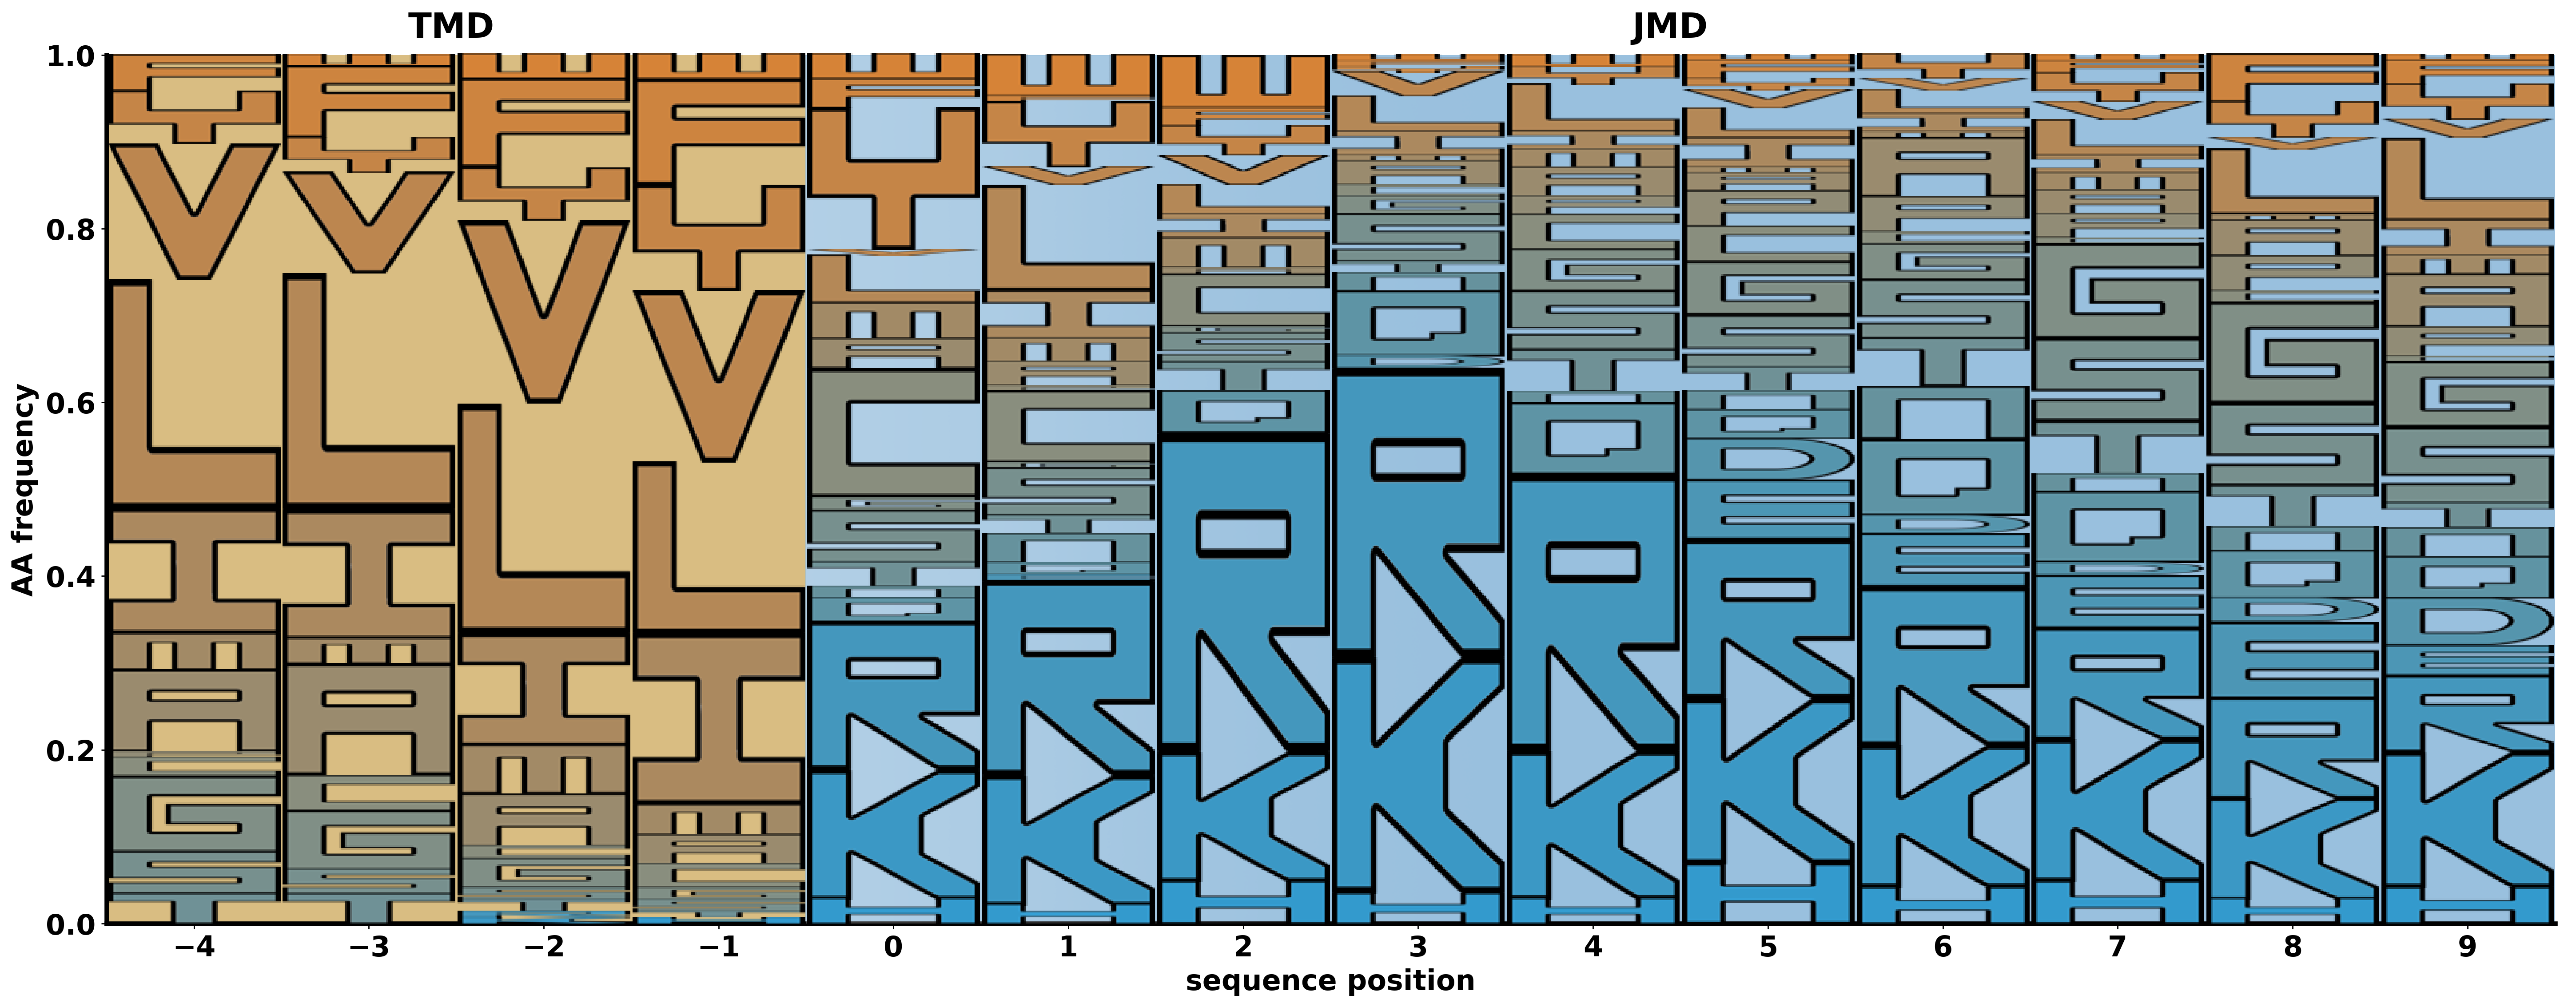

In [5]:
# initialization
# set_legend, list_columns
Example2_AAlogo = AALogorizer.AALogoGenerator(set_legend=False, list_columns=df_columns, start_pos = False)  # legend automatically set False

# Plot generation command
# make_logo(df, name, length_tmd, length_jmd, aa_config_section_name, font_type="classic_AA_fonts")
Example2_AAlogo.make_logo(df=test_data, name="Substrates_TMHMM", length_right=10, length_left=4, 
                          font_type="bold_AA_fonts", config_set = False, list_title_sides = ["TMD", "JMD"])

### using advanced color mapping with color advance

In [6]:
data_hydrophobicity_scales = pd.read_excel("scales_hydrophobicity.xlsx")
data_hydrophobicity_scales

,aa_code,aa_name,Kyte-Doolittle,Hopp-Woods,Cornette,Eisenberg,Rose,Janin,Engelman GES
0,A,Alanine,1.8,-0.5,0.2,0.62,0.74,0.3,1.6
1,C,Cysteine,2.5,-1.0,4.1,0.29,0.91,0.9,2.0
2,D,Aspartic acid,-3.5,3.0,-3.1,-0.90,0.62,-0.6,-9.2
3,E,Glutamic acid,-3.5,3.0,-1.8,-0.74,0.62,-0.7,-8.2
4,F,Phenylalanine,2.8,-2.5,4.4,1.19,0.88,0.5,3.7
5,G,Glycine,-0.4,0.0,0.0,0.48,0.72,0.3,1.0
6,H,Histidine,-3.2,-0.5,0.5,-0.40,0.78,-0.1,-3.0
7,I,Isoleucine,4.5,-1.8,4.8,1.38,0.88,0.7,3.1
8,K,Lysine,-3.9,3.0,-3.1,-1.50,0.52,-1.8,-8.8
9,L,Leucine,3.8,-1.8,5.7,1.06,0.85,0.5,2.8


In [7]:
# sorting the dataframe after propensities for Kyte-Doolittle
KD_df = data_hydrophobicity_scales[["aa_code", "Kyte-Doolittle"]].sort_values(by="Kyte-Doolittle", ascending=False).reset_index().drop("index", axis=1)
KD_df 

,aa_code,Kyte-Doolittle
0,I,4.5
1,V,4.2
2,L,3.8
3,F,2.8
4,C,2.5
5,M,1.9
6,A,1.8
7,G,-0.4
8,T,-0.7
9,S,-0.8


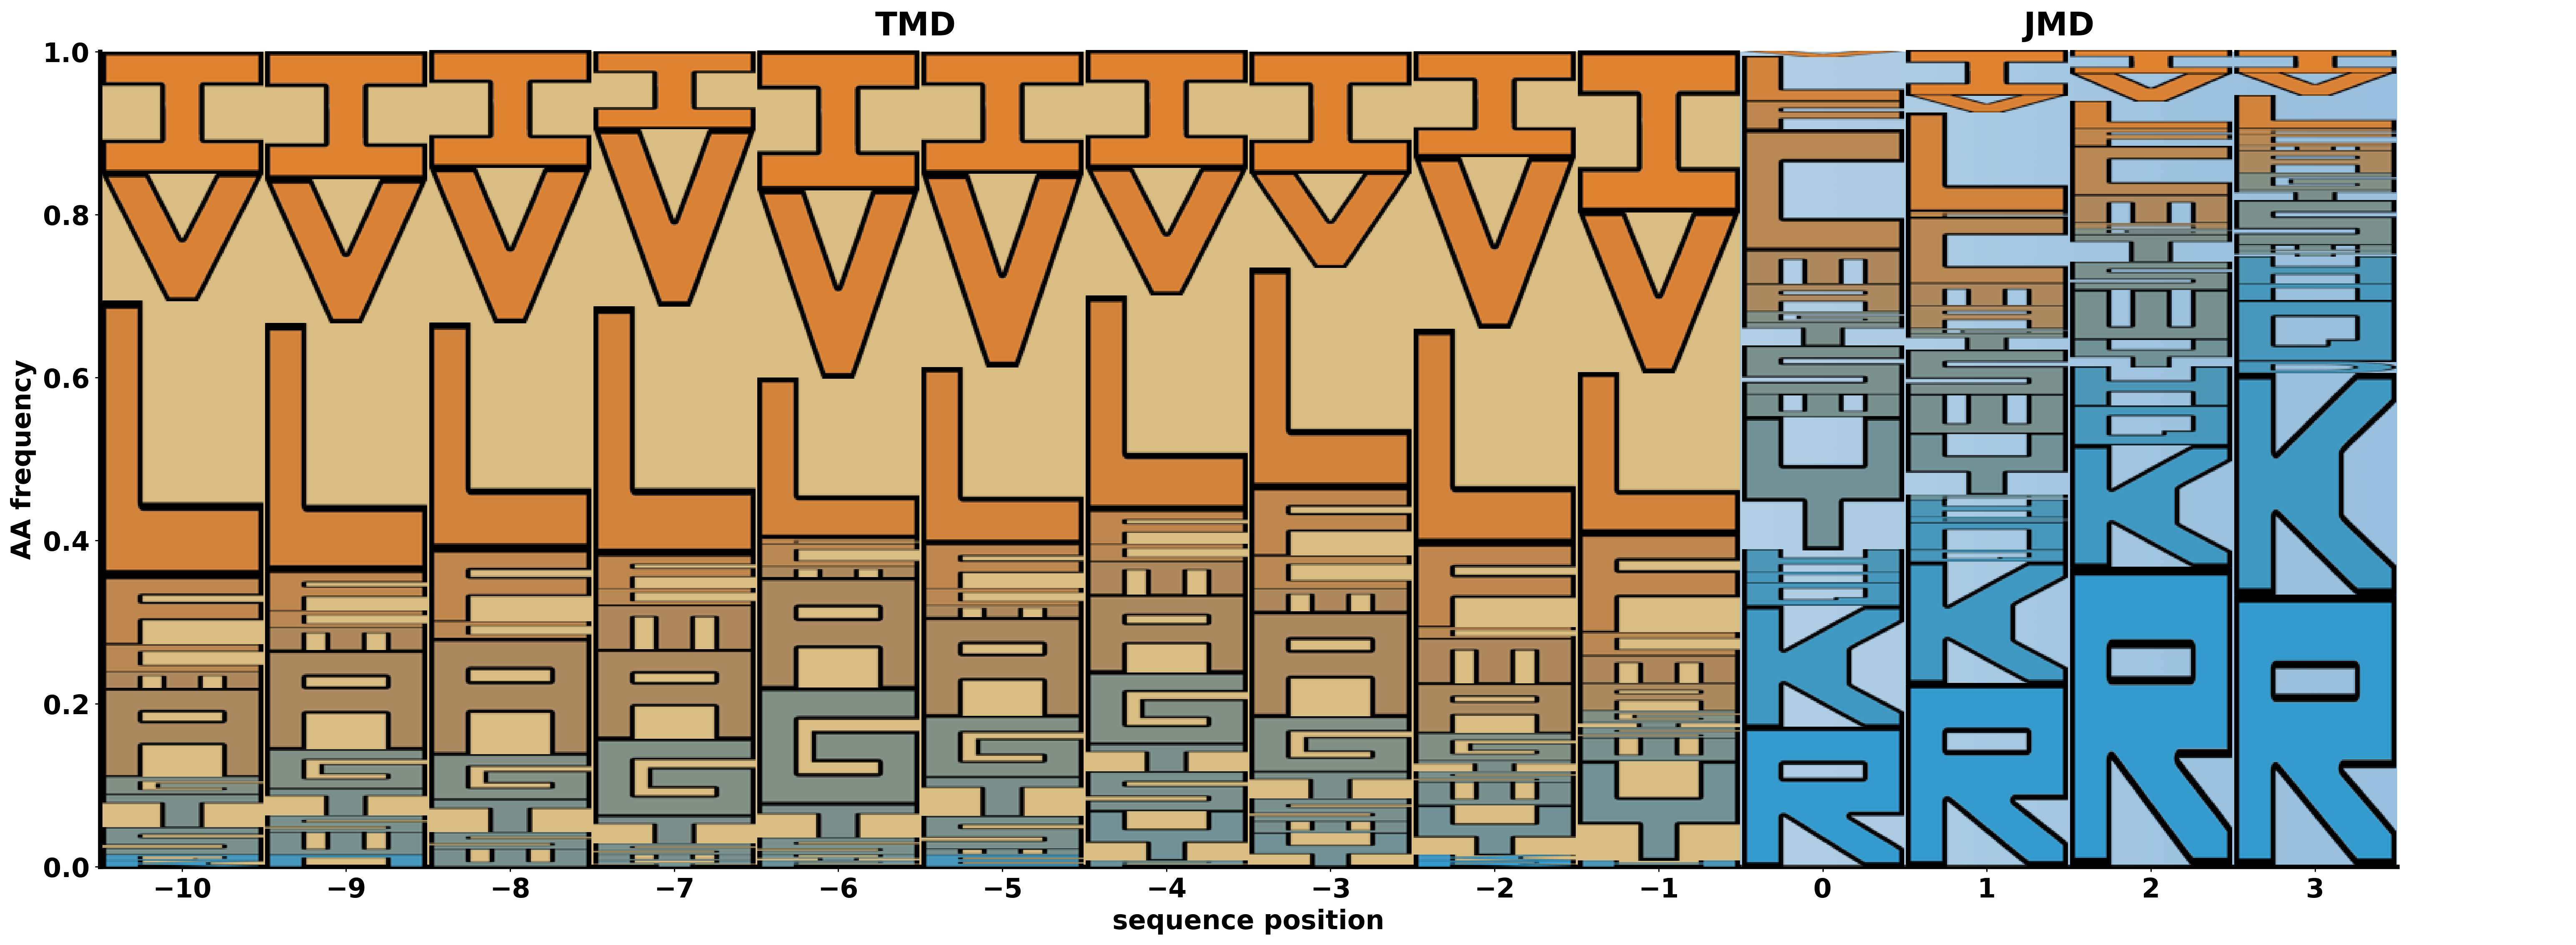

In [8]:
# initialization
# set_legend, list_columns
Example2_AAlogo = AALogorizer.AALogoGenerator(set_legend=False, list_columns=df_columns, start_pos = False)  # legend automatically set False

# Plot generation command
# make_logo(df, name, length_tmd, length_jmd, aa_config_section_name, font_type="classic_AA_fonts")
Example2_AAlogo.make_logo(df=test_data, name="Substrates_TMHMM", length_right=4, length_left=10, 
                          font_type="bold_AA_fonts", config_set = False, order_aa_grad = KD_df["aa_code"], color_advance = KD_df["Kyte-Doolittle"], list_title_sides = ["TMD", "JMD"])